In [21]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(15,8)})

import warnings
warnings.filterwarnings('ignore')

In [2]:
adani_df = pd.read_csv('ADANIPORTS.csv',index_col='Date',parse_dates=True)
adani_df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [12]:
data = adani_df.iloc[:,:3]
data = data.drop(['Symbol','Series'],axis=1)

In [13]:
data.head()

,Prev Close
Date,
2007-11-27,440.00
2007-11-28,962.90
2007-11-29,893.90
2007-11-30,884.20
2007-12-03,921.55


In [14]:
data.tail()

,Prev Close
Date,
2021-04-26,725.35
2021-04-27,730.75
2021-04-28,749.15
2021-04-29,746.25
2021-04-30,746.75


<AxesSubplot:xlabel='Date'>

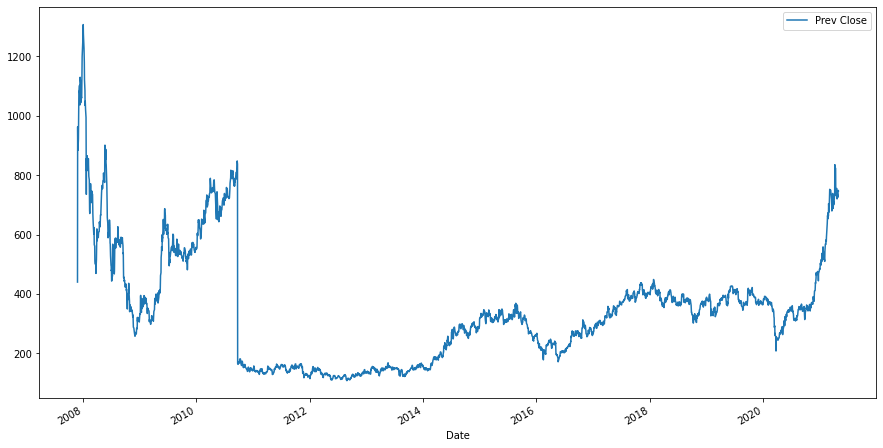

In [16]:
data.plot()

In [17]:
data.describe()

,Prev Close
count,3322.000000
mean,344.114314
std,192.936882
min,108.000000
25%,164.312500
50%,324.700000
75%,400.912500
max,1307.450000


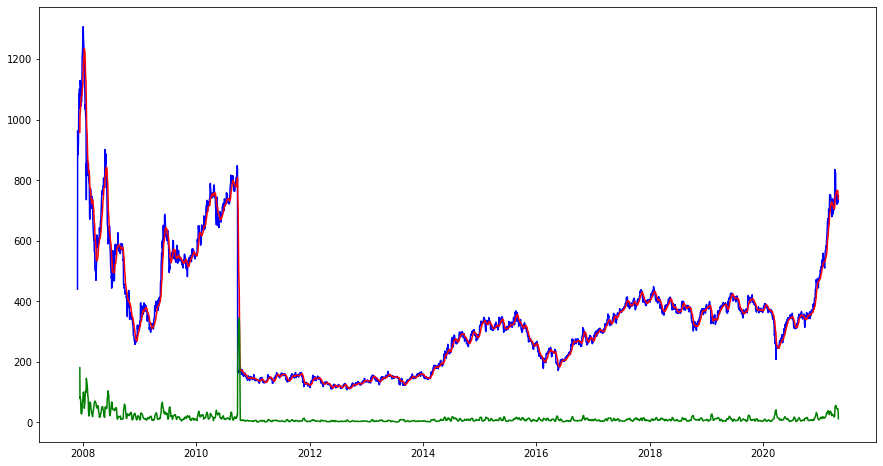

In [18]:
#checking data sationary or not
#1. rolling mean
#2. dickey fuller test

rollinge_mean = data.rolling(window=12).mean()
rollinge_std = data.rolling(window=12).std()

plt.plot(data,color='blue')
plt.plot(rollinge_mean,color='red')
plt.plot(rollinge_std,color='green')

In [23]:
from statsmodels.tsa.stattools import adfuller

# null hypothesis - not stationary 
# if p-value < 0.05 - reject the null hypothesis

adfuller_result = adfuller(data['Prev Close'])

print(f"ADF statistic: {adfuller_result[0]}")
print(f"p-value: {adfuller_result[1]}")
print(f"no of lags: {adfuller_result[2]}")
print(f"no of obs used for ADF reg and Critical Value calc: {adfuller_result[3]}")
print("critical values")
for key, value in adfuller_result[4].items():
    print(f"{key}:{value}")

if adfuller_result[1] < 0.05:
    print("reject the null hypothesis and data is stationary")

ADF statistic: -3.3272512680685775
p-value: 0.013703427405233838
no of lags: 5
no of obs used for ADF reg and Critical Value calc: 3316
critical values
1%:-3.4323235733856885
5%:-2.862412008588944
10%:-2.5672341879086087
reject the null hypothesis and data is stationary


In [25]:
from statsmodels.tsa.stattools import acf ,pacf
lag_acf = acf(data.dropna() ,nlags=20)  # for moving average
lag_pacf = pacf(data.dropna() ,nlags=20) # for AutoRegressor

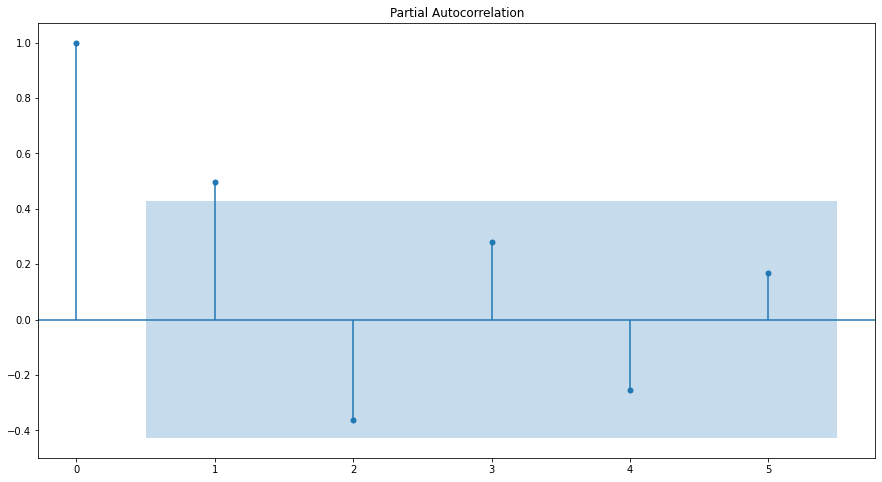

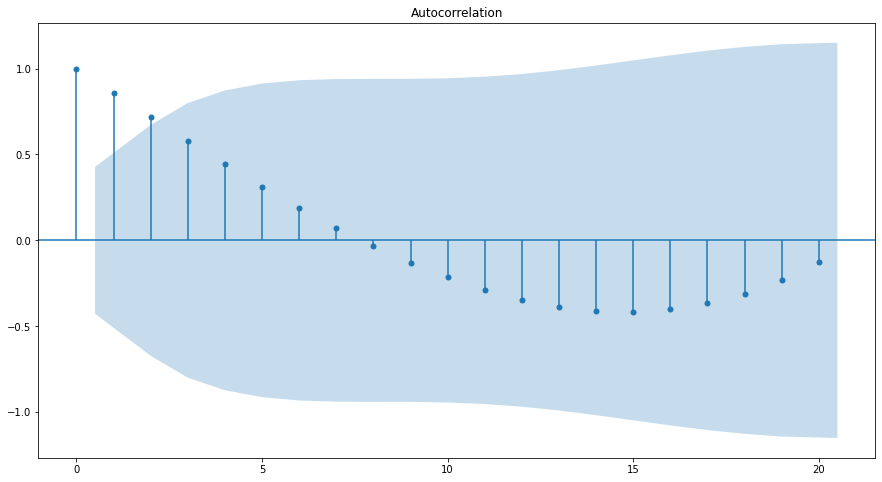

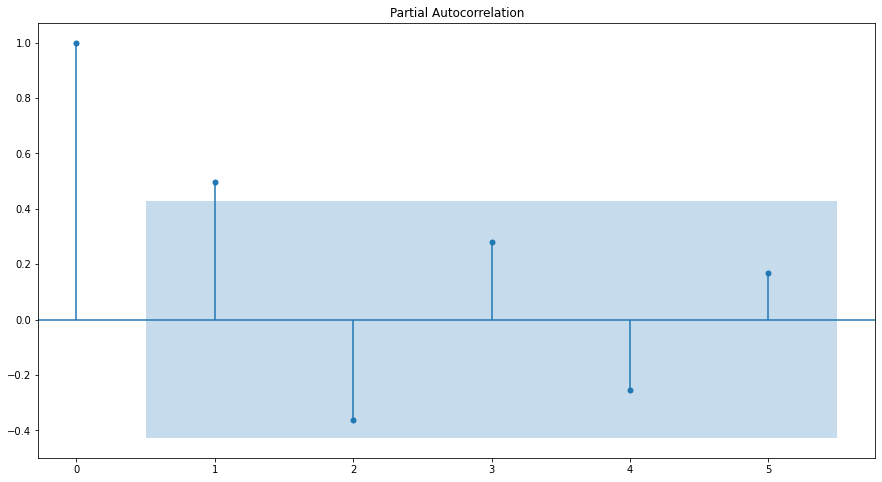

In [26]:
#from statsmodels.api.graphics.tsa import plot_acf,plot_pacf
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(lag_acf, lags=20)  #MA=3 , 4
sm.graphics.tsa.plot_pacf(lag_pacf, lags=5) # AR = 2,

In [27]:
data.head()

,Prev Close
Date,
2007-11-27,440.00
2007-11-28,962.90
2007-11-29,893.90
2007-11-30,884.20
2007-12-03,921.55


In [34]:
## auto arima model
from pmdarima import auto_arima

stepwise_fit = auto_arima(data['Prev Close'], trace=True , suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.72 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=28957.762, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=28959.762, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=28959.762, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=28955.841, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=28958.692, Time=1.17 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.895 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3322
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -14476.921
Date:                Sun, 26 Sep 2021   AIC                          28955.841
Time:                        19:51:21   BIC                          28961.949
Sample:                             0   HQIC                         28958.027
                               - 3322                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       358.0005      0.485    738.567      0.000     357.051     358.951
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          59426579.78
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.09   Skew:                            -7.08
Prob(H) (two-sided):                  0.00   Kurtosis:                       658.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
train = data[:2658]
test = data[2658:]

In [37]:
train.head()

,Prev Close
Date,
2007-11-27,440.00
2007-11-28,962.90
2007-11-29,893.90
2007-11-30,884.20
2007-12-03,921.55


In [65]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train['Prev Close'] , order=(0,1,0))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Prev Close   No. Observations:                 2657
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -11793.929
Method:                           css   S.D. of innovations             20.489
Date:                Sun, 26 Sep 2021   AIC                          23591.858
Time:                        20:02:43   BIC                          23603.628
Sample:                             1   HQIC                         23596.118
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0248      0.397     -0.062      0.950      -0.804       0.754
==============================================================================
"""

In [69]:
## predicting for test data 
start_value = len(train)
end_value = len(train)+len(test)-1

pred = model_fit.predict(start=start_value, end=end_value, typ='levels')
#print(pred)
## because the index is not date value s0
pred.index = data.index[start_value : end_value+1 ]
print(pred)

Date
2018-08-21    374.075198
2018-08-23    374.050395
2018-08-24    374.025593
2018-08-27    374.000790
2018-08-28    373.975988
                 ...    
2021-04-26    357.730410
2021-04-27    357.705608
2021-04-28    357.680805
2021-04-29    357.656003
2021-04-30    357.631201
Length: 664, dtype: float64


<AxesSubplot:xlabel='Date'>

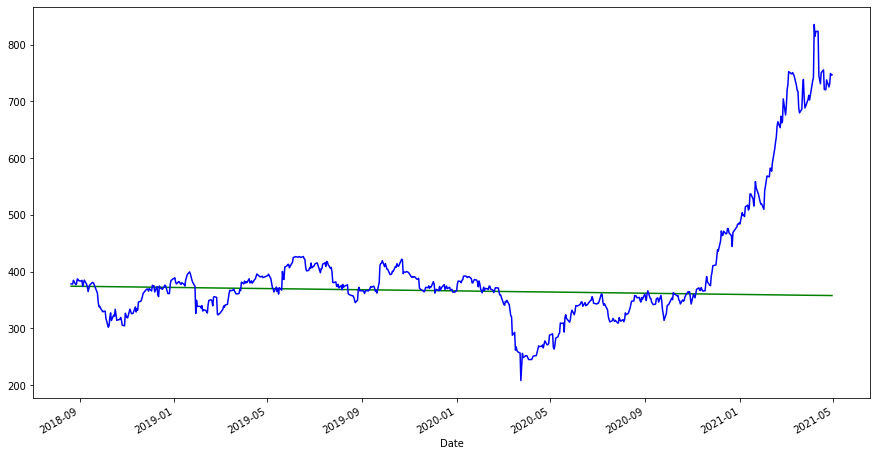

In [67]:
pred.plot(color='green')
test['Prev Close'].plot(color='blue')

In [64]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(pred,test['Prev Close']))

13181.568633655635


In [70]:
### future pred we train model in entir dataset
model = ARIMA(data['Prev Close'] , order=(0,1,0))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Prev Close   No. Observations:                 3321
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -14476.881
Method:                           css   S.D. of innovations             18.921
Date:                Sun, 26 Sep 2021   AIC                          28957.762
Time:                        20:03:41   BIC                          28969.978
Sample:                             1   HQIC                         28962.133
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0924      0.328      0.281      0.778      -0.551       0.736
==============================================================================
"""

In [71]:
data.tail()

,Prev Close
Date,
2021-04-26,725.35
2021-04-27,730.75
2021-04-28,749.15
2021-04-29,746.25
2021-04-30,746.75


In [82]:
## making pred from last date to 30 days away
index_future_dates = pd.date_range(start='2021-04-30',end='2021-05-30')

start_value = len(data)
end_value = len(data)+30
pred = model_fit.predict(start_value,end_value,typ='levels')
## becasue not date index so
pred.index = index_future_dates

In [83]:
pred

2021-04-30    746.842367
2021-05-01    746.934734
2021-05-02    747.027102
2021-05-03    747.119469
2021-05-04    747.211836
2021-05-05    747.304203
2021-05-06    747.396571
2021-05-07    747.488938
2021-05-08    747.581305
2021-05-09    747.673672
2021-05-10    747.766040
2021-05-11    747.858407
2021-05-12    747.950774
2021-05-13    748.043141
2021-05-14    748.135509
2021-05-15    748.227876
2021-05-16    748.320243
2021-05-17    748.412610
2021-05-18    748.504978
2021-05-19    748.597345
2021-05-20    748.689712
2021-05-21    748.782079
2021-05-22    748.874447
2021-05-23    748.966814
2021-05-24    749.059181
2021-05-25    749.151548
2021-05-26    749.243916
2021-05-27    749.336283
2021-05-28    749.428650
2021-05-29    749.521017
2021-05-30    749.613385
Freq: D, dtype: float64

<AxesSubplot:xlabel='Date'>

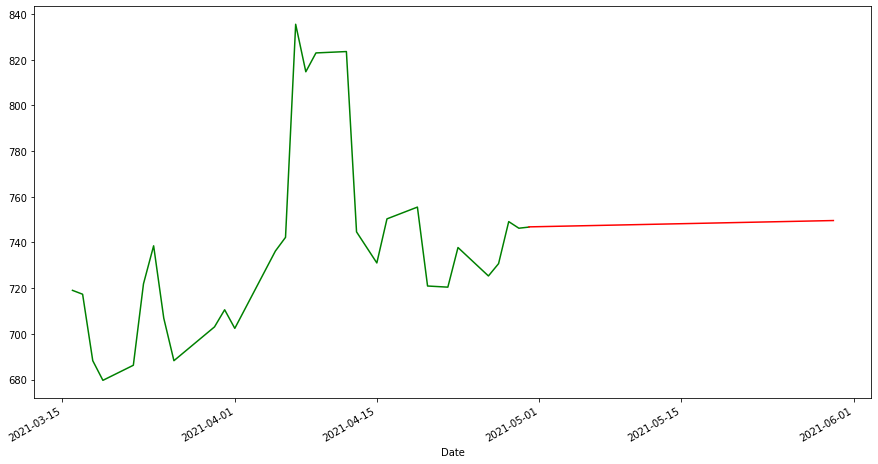

In [89]:
data['Prev Close'][3292:].plot(color='green')
pred.plot(color='red')